#IA376N

Profa. Dra. Paula D. Paro Costa
Depto. de Eng. de Computação e Automação (DCA)
Faculdade de Engenharia Elétrica e de Computação (FEEC)
paulad@unicamp.br

#Nome dos integrantes da equipe:

*   Byron Alejandro Acuña Acurio. RA: 209428
*   José Carlos Ferreira. RA: 170860

#Trabalho: Síntese de Dados Financeiros para Otimização de Portfólio

##Declaração do problema:

No setor financeiro, o acesso a dados do mundo real para análise e treinamento
de modelos é frequentemente restrito devido a questões de privacidade e
segurança. Assim os dados sintéticos podem ajudar a fornecer uma alternativa
segura para o uso de dados.

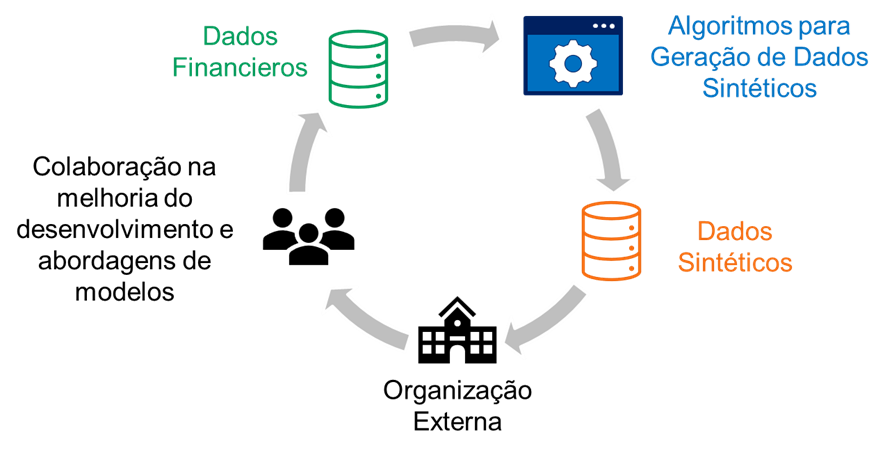

O objetivo é explorar abordagens e desenvolver algoritmos para produzir dados sintéticos financeiros, retendo o máximo de informações estatísticas para permitir o desenvolvimento de modelos de otimização de portfólios e outras aplicações financeiras.

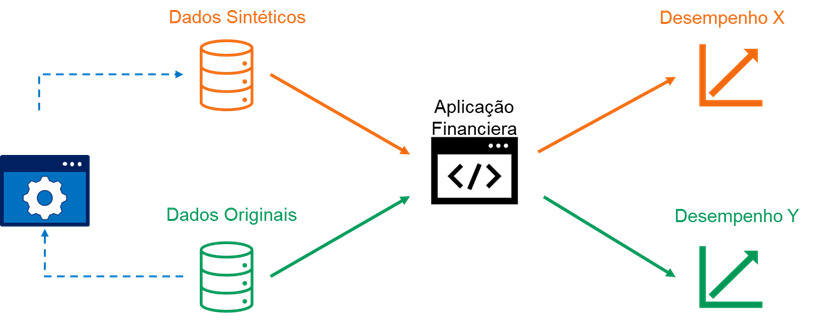

# Modelo Estatístico Clássico Generativo Baseline

In [1]:
!git clone https://github.com/byronacunia/dgm-2024.2.git

Cloning into 'dgm-2024.2'...
remote: Enumerating objects: 1246, done.
remote: Counting objects: 100% (591/591), done.
remote: Compressing objects: 100% (421/421), done.
remote: Total 1246 (delta 397), reused 267 (delta 159), pack-reused 655 (from 1)
Receiving objects: 100% (1246/1246), 83.42 MiB | 18.48 MiB/s, done.
Resolving deltas: 100% (538/538), done.
Updating files: 100% (125/125), done.


In [2]:
import pandas as pd

In [5]:
asset_prices = pd.read_csv('/content/dgm-2024.2/projetos/FinancialDataSynthesis/src/data/Bloomberg Dataset/asset_prices.csv', index_col=0)
asset_prices.index = pd.to_datetime(asset_prices.index)

In [6]:
asset_prices

,us_equities,us_equities_tech,global_equities,em_equities,us_hy,us_ig,em_debt,cmdty,long_term_treasuries,short_term_treasuries
date,,,,,,,,,,
2002-12-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2003-01-01,100.000000,100.000000,100.000000,100.037640,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2003-01-02,103.330233,104.419116,102.428842,100.686243,100.000000,99.106168,99.855467,102.573092,97.979289,99.717144
2003-01-03,103.280216,104.802111,102.752347,102.716393,99.925524,99.267621,100.090849,104.052273,98.041076,99.696192
2003-01-04,103.280216,104.802111,102.752347,102.716393,99.925524,99.267621,100.090849,104.052273,98.041076,99.696192
...,...,...,...,...,...,...,...,...,...,...
2022-06-10,651.749152,1411.521782,542.794738,609.864005,310.110195,236.072566,333.647175,154.747360,244.886198,140.516474
2022-06-11,651.749152,1411.521782,542.794738,609.864005,310.110195,236.072566,333.647175,154.747360,244.886198,140.516474
2022-06-12,651.749152,1411.521782,542.794738,609.864005,310.110195,236.072566,333.647175,154.747360,244.886198,140.516474


In [7]:
asset_returns = asset_prices.pct_change().dropna()

In [8]:
asset_returns

,us_equities,us_equities_tech,global_equities,em_equities,us_hy,us_ig,em_debt,cmdty,long_term_treasuries,short_term_treasuries
date,,,,,,,,,,
2003-01-01,0.000000,0.000000,0.000000,0.000376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2003-01-02,0.033302,0.044191,0.024288,0.006484,0.000000,-0.008938,-0.001445,0.025731,-0.020207,-0.002829
2003-01-03,-0.000484,0.003668,0.003158,0.020163,-0.000745,0.001629,0.002357,0.014421,0.000631,-0.000210
2003-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2003-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2022-06-10,-0.029082,-0.035613,-0.029420,-0.011616,-0.012207,-0.012233,-0.009003,-0.008569,-0.006552,-0.004379
2022-06-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-06-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


##  Método estatístico baseado em uma distribuição normal gaussiana multivariada

$$f(x)=\frac{1}{\sqrt{(2 \pi)^d \operatorname{det}(\Sigma)}} \exp \left(-\frac{1}{2}(x-\mu)^T \Sigma^{-1}(x-\mu)\right)$$

onde, $\mu \in \mathbb{R}^d, d=10$, neste caso $d$ é o número de colunas, e sua matriz de covariancia é $\Sigma \in \mathbb{R}^{d \times d}$

In [11]:
# A continuçao fazemos o calculo da matriz de covariancias e o vetor de meias.
asset_returns_means = asset_returns.mean()
asset_returns_cov_matrix = asset_returns.cov()

In [12]:
from scipy.stats import multivariate_normal
synthetic_asset_returns_data = multivariate_normal.rvs(mean=asset_returns_means, cov=asset_returns_cov_matrix, size=asset_returns.shape[0])

In [14]:
synthetic_asset_returns_data_df = pd.DataFrame(synthetic_asset_returns_data, columns=asset_returns.columns)

In [15]:
def prepare_data_for_pairplot(asset_returns, synthetic_data):
    """
    Prepares the data from original asset returns and synthetic data to be used for pair-plot comparison.
    Combines original (asset_returns) and synthetic data into a single DataFrame and applies log scaling.
    """
    # Apply log scaling to both original and synthetic data to handle large ranges
    asset_returns_log = asset_returns.apply(lambda x: np.log1p(x))  # log1p(x) = log(1 + x)
    synthetic_data_log = synthetic_data.apply(lambda x: np.log1p(x))

    # Original asset returns
    weighted_original_returns = asset_returns_log.copy()
    weighted_original_returns['Dataset'] = 'Original'

    # Synthetic data (portfolios)
    weighted_synthetic_returns = synthetic_data_log.copy()
    weighted_synthetic_returns['Dataset'] = 'Synthetic'

    # Combine both datasets for comparison
    combined_df = pd.concat([weighted_original_returns, weighted_synthetic_returns])

    return combined_df

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_pair_comparison(asset_returns, synthetic_data, title="Pair-plot comparison of original vs synthetic data"):
    """
    Generates a pair-plot to compare asset returns (original) vs synthetic data by asset class.
    """
    # Prepare the data for pairplot
    combined_data = prepare_data_for_pairplot(asset_returns, synthetic_data)

    # Generate the pairplot for the asset returns, distinguishing by the dataset (Original vs Synthetic)
    sns.pairplot(combined_data, hue='Dataset', plot_kws={'alpha': 0.5, 's': 25}, corner=True)

    # Add title
    plt.suptitle(title, y=1.02, fontsize= 16)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

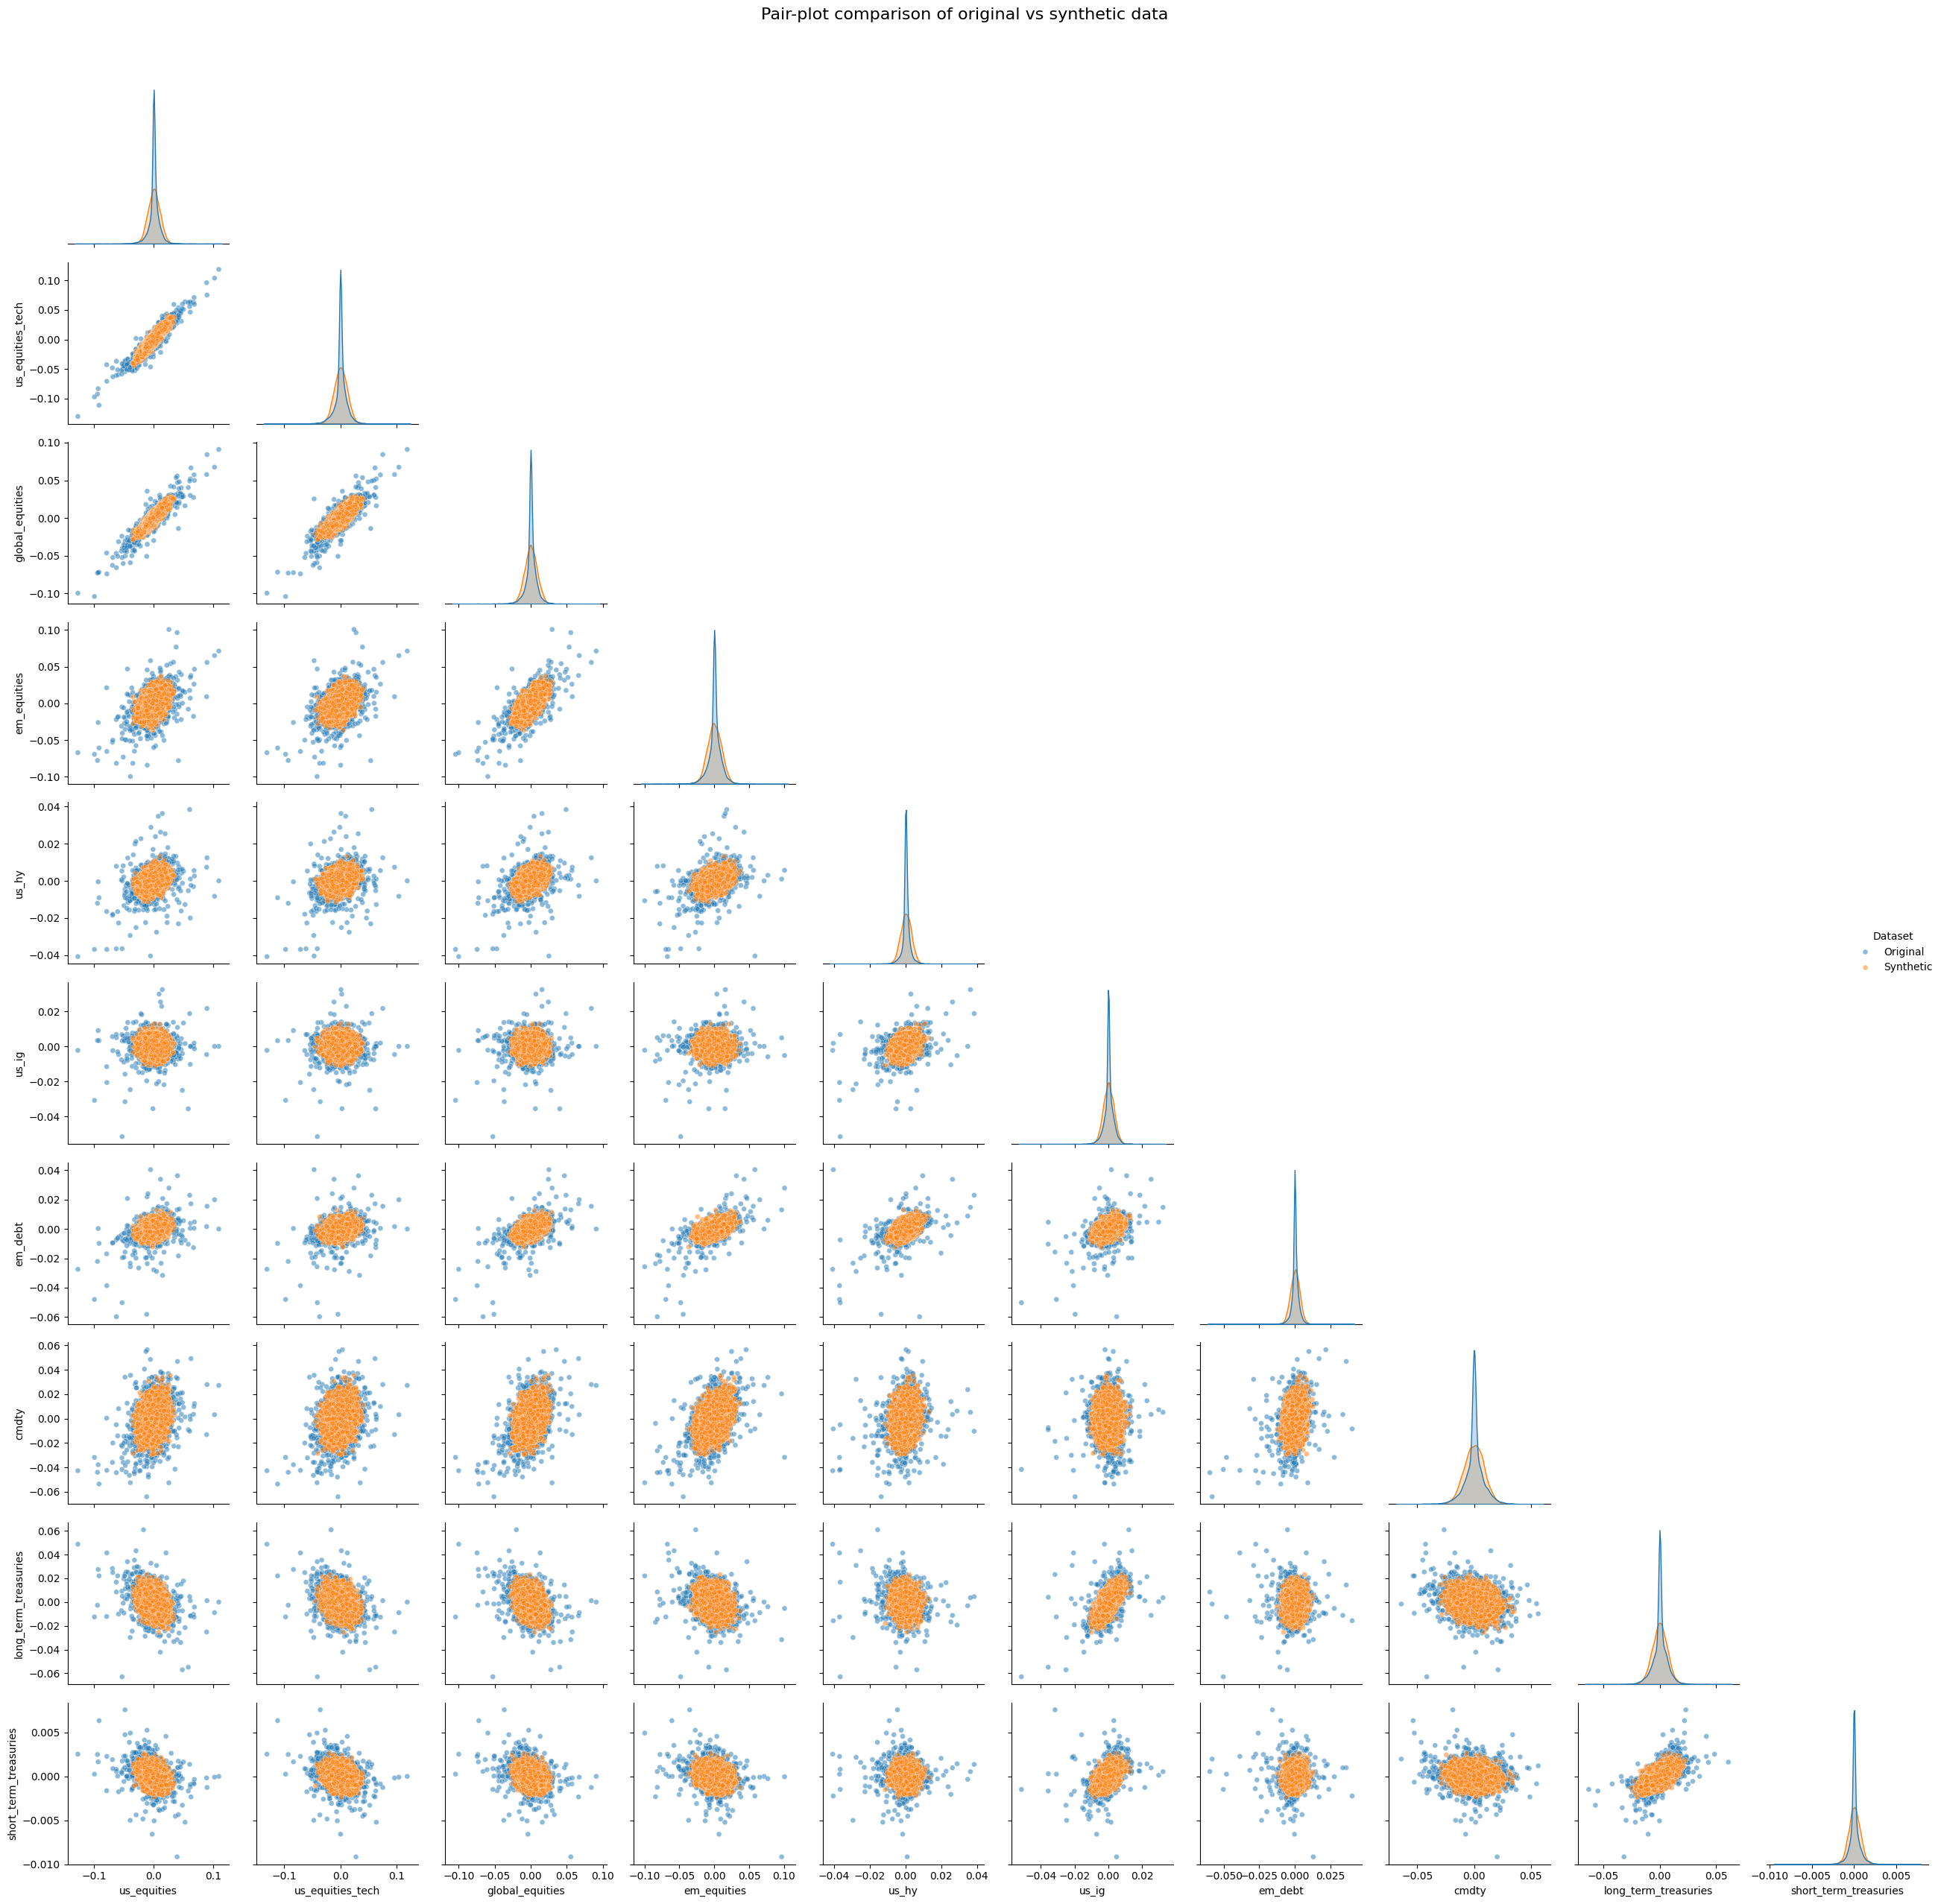

In [19]:
plot_pair_comparison(asset_returns, synthetic_asset_returns_data_df)

#Kolmogorov-Smirnov test

In [24]:
import scipy.stats as st
def get_best_distribution(data):
  dist_names = ["norm",     #Normal (Gaussian)
                "dgamma",   #Double Gamma
                "dweibull", #Doule Weibull
                "exponweib",#Exponentiated Weibull
                "gamma",    #Gamma
                "gengamma", #Generalized gamma
                "genlogistic", #Generalized Logistic
                "gumbel_l", #Left Sided Gumbel, etc.
                "gumbel_r", #Right Sided Gumbel
                "hypsecant", #Hyperbolic Secant
                "johnsonsb", #Johnson SB
                "johnsonsu", #Johnson SU
                "laplace", #Laplace
                "logistic", #Logistic
                "loggama", #Log-Gamma
                "lognorm", #Log-Normal
                "powernorm", #Pwer normal
                "t",          #Student's T
                "weibull_max", #Maximum Weibull (see Frechet)
                ]
  dist_results = []
  params = {}

  for dist_name in dist_names:
    dist = getattr(st, dist_name) #Truco para usar scipy con diferentes funciones
    param = dist.fit(data)
    params[dist_name] = param
    # Applying the Kolmogorov-Smirnov test
    D, p = st.kstest(data, dist_name, args = param)
    dist_results.append((dist_name, p))
    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key= lambda item: item[1]))
    return best_dist, best_p, params[best_dist]

In [41]:
for column in asset_returns.columns:
    print(column)
    a, b, c = get_best_distribution(asset_returns[column])
    print("A melhor distribuição para " + column + " é " + a +
          " com locação: " + str(b) + " e scale: " + str(c))

us_equities
A melhor distribuição para us_equities é norm com locação: 1.685216724737412e-208 e scale: (0.0003080652777771914, 0.010011974980190345)
us_equities_tech
A melhor distribuição para us_equities_tech é norm com locação: 7.404571233341028e-199 e scale: (0.0004333450378712889, 0.011567930285062937)
global_equities
A melhor distribuição para global_equities é norm com locação: 1.858146290504068e-177 e scale: (0.00026952807731363103, 0.008546458670344283)
em_equities
A melhor distribuição para em_equities é norm com locação: 1.050115054118148e-171 e scale: (0.00029959147432292234, 0.010010899397987045)
us_hy
A melhor distribuição para us_hy é norm com locação: 3.3483821343827e-311 e scale: (0.0001597044924040665, 0.0030100336391483593)
us_ig
A melhor distribuição para us_ig é norm com locação: 6.794595366888738e-200 e scale: (0.00012231307175737162, 0.0031242057850731737)
em_debt
A melhor distribuição para em_debt é norm com locação: 5.627258279248324e-235 e scale: (0.00017154041

In [42]:
for column in synthetic_asset_returns_data_df.columns:
    print(column)
    a, b, c = get_best_distribution(synthetic_asset_returns_data_df[column])
    print("A melhor distribuição para " + column + " é " + a +
          " com locação: " + str(b) + " e scale: " + str(c))

us_equities
A melhor distribuição para us_equities é norm com locação: 0.8712991178393272 e scale: (0.00031517178823633655, 0.010031233430216197)
us_equities_tech
A melhor distribuição para us_equities_tech é norm com locação: 0.9999363353674521 e scale: (0.0004423933715999666, 0.011506441578356412)
global_equities
A melhor distribuição para global_equities é norm com locação: 0.8262340740641605 e scale: (0.0002769218922179533, 0.008518038373069595)
em_equities
A melhor distribuição para em_equities é norm com locação: 0.7719323057712393 e scale: (0.0001952609332005902, 0.01003925231451018)
us_hy
A melhor distribuição para us_hy é norm com locação: 0.6921085869042951 e scale: (0.00020178307264897218, 0.0030105898654699806)
us_ig
A melhor distribuição para us_ig é norm com locação: 0.8085298569509334 e scale: (9.003512913482093e-05, 0.0031520629732215842)
em_debt
A melhor distribuição para em_debt é norm com locação: 0.5354520552288858 e scale: (0.00019769770646579874, 0.003218226563704

In [31]:
asset_returns.describe()

,us_equities,us_equities_tech,global_equities,em_equities,us_hy,us_ig,em_debt,cmdty,long_term_treasuries,short_term_treasuries
count,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000
mean,0.000308,0.000433,0.000270,0.000300,0.000160,0.000122,0.000172,0.000092,0.000143,0.000047
std,0.010013,0.011569,0.008547,0.010012,0.003010,0.003124,0.003222,0.008662,0.006475,0.000676
min,-0.119799,-0.121919,-0.098985,-0.094840,-0.039958,-0.050266,-0.058020,-0.062002,-0.061018,-0.009126
25%,-0.001398,-0.002005,-0.001581,-0.002339,-0.000077,-0.000634,-0.000312,-0.002703,-0.001867,-0.000119
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.003113,0.004164,0.003068,0.004095,0.000813,0.001260,0.001108,0.003216,0.002624,0.000204
max,0.115800,0.125799,0.095238,0.105988,0.039147,0.032970,0.041282,0.058125,0.062780,0.007614


In [32]:
synthetic_asset_returns_data_df.describe()

,us_equities,us_equities_tech,global_equities,em_equities,us_hy,us_ig,em_debt,cmdty,long_term_treasuries,short_term_treasuries
count,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000
mean,0.000315,0.000442,0.000277,0.000195,0.000202,0.000090,0.000198,0.000033,-0.000033,0.000042
std,0.010032,0.011507,0.008519,0.010040,0.003011,0.003152,0.003218,0.008695,0.006535,0.000673
min,-0.034198,-0.043144,-0.028438,-0.036010,-0.011335,-0.011114,-0.012234,-0.029154,-0.025201,-0.002362
25%,-0.006485,-0.007325,-0.005517,-0.006624,-0.001813,-0.002065,-0.001984,-0.005882,-0.004387,-0.000400
50%,0.000309,0.000408,0.000193,0.000065,0.000208,0.000091,0.000269,0.000166,-0.000006,0.000044
75%,0.007040,0.008302,0.006021,0.007035,0.002247,0.002247,0.002380,0.006004,0.004374,0.000496
max,0.035337,0.041011,0.029395,0.037752,0.013215,0.013007,0.012976,0.036003,0.023402,0.002616


In [47]:
def plot_efficient_frontier(asset_returns, Label):
    # Covariance matrix and Cholesky decomposition based on historical data
    cov_matrix = np.cov(asset_returns, rowvar=False)
    cov_sqrt = np.linalg.cholesky(cov_matrix)

    # Generate a random sample based on the original data size
    sample = np.random.rand(4100, asset_returns.shape[1])

    # Standardize each portfolio so the weights in each row sum to 1
    sample_portfolio = sample / sample.sum(axis=1).reshape(-1, 1)

    # Calculate expected return (mu) based on historical data
    mu = np.array(asset_returns.mean(axis=0)).reshape(-1, 1)
    mu_sample = sample_portfolio @ mu  # Expected return of each portfolio

    # Calculate standard deviation (risk) for each portfolio
    std_sample = np.linalg.norm(cov_sqrt @ sample_portfolio.T, ord=2, axis=0).reshape(-1, 1)

    # Calculate Sharpe ratio (assuming risk-free rate is 0)
    sharpe_sample = mu_sample / std_sample

    # Plotting the Efficient Frontier
    fig, ax = plt.subplots(figsize=(10, 8))
    sc = ax.scatter(std_sample, mu_sample, c=sharpe_sample * 100, cmap='viridis')  # Sharpe ratio as color
    ax.set_xlabel("Standard Deviation")
    ax.set_ylabel("Expected Return")
    ax.set_title("Efficient Frontier"+Label)

    # Add a colorbar for the Sharpe ratio
    cbar = plt.colorbar(sc)
    cbar.set_label('Sharpe Ratio', rotation=270, labelpad=20)

    # Display the figure
    plt.show()

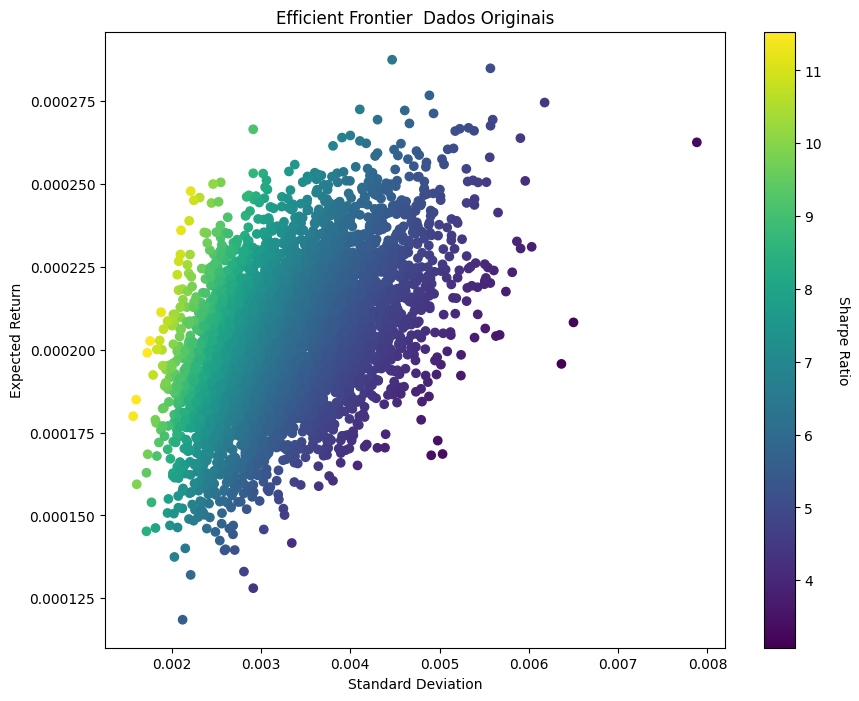

In [50]:
plot_efficient_frontier(asset_returns,"  Dados Originais")

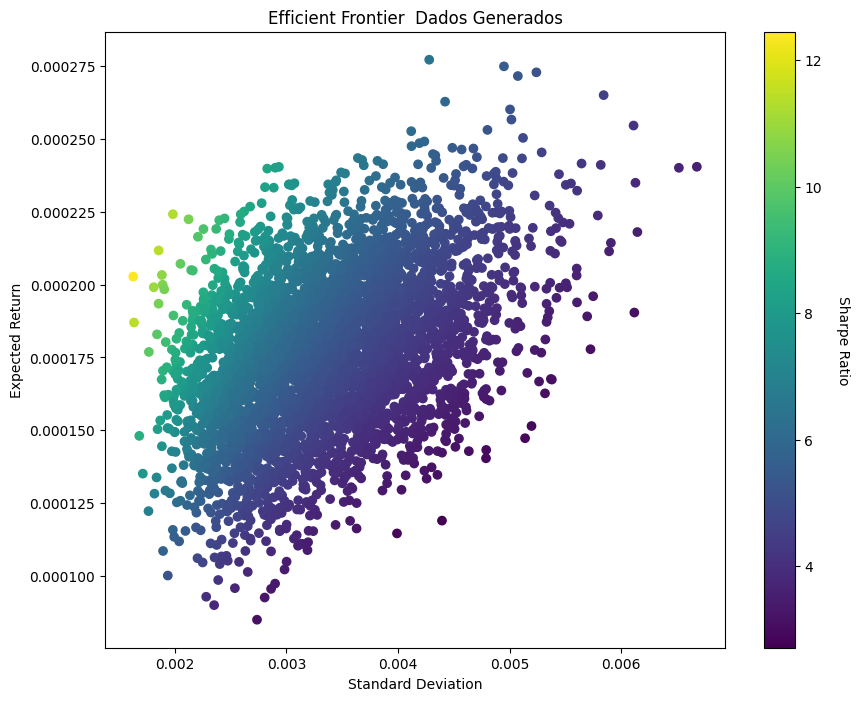

In [51]:
plot_efficient_frontier(synthetic_asset_returns_data_df,"  Dados Generados")